In [127]:
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
import pandas as pd
import zsh_in_jupyter as jz
sympy.init_printing()
%config InlineBackend.figure_format='svg' #'png2x','svg','jpeg','pdf','png','jpg','retina'y

$$
\text{自定义命令}  
\newcommand{\inner}[2]{{\langle #1,#2\rangle}}
\newcommand{\dlim}{\displaystyle \lim}  
\newcommand{\dint}{\displaystyle \int}   
\newcommand{\ra}{\rangle}  
\newcommand{\la}{\langle}   
\newcommand{\inner}[2]{{\langle #1,#2\rangle}}
\newcommand{\x}{\mathbf{x}}   
\newcommand{\xt}{\mathbf{x}^{\mathsf{T}}}   
\newcommand{\T}{{\mathsf{T}}}
\newcommand{\abf}{\mathbf{a}}   
\newcommand{\abft}{\mathbf{a}^{\mathsf{T}}}   
\newcommand{\R}{\mathbb{R}}   
\newcommand{\C}{\mathbb{C}}   
\newcommand{\E}{\mathrm{e}}   
\newcommand{\F}{\mathbb{F}}   
\newcommand{\X}{\mathbf{X}}   
\newcommand{\Y}{\mathbf{Y}}  
\newcommand{\f}{\mathbf{f}}  
\newcommand{\U}{\mathbf{u}}   
\newcommand{\D}{\mathrm{d}}  
\newcommand{\M}{\mathcal{M}}  
\newcommand{\LL}{\mathcal{L}}  
\newcommand{\nullspace}{\mathrm{null}}   
\newcommand{\range}{\mathrm{range}}   
\newcommand{\Sum}[2]{{\sum_{#1}^{#2}}}   
\newcommand{\Union}[2]{{\bigcup_{#1}^{#2}}}   
\newcommand{\Intersection}[2]{{\bigcap_{#1}^{#2}}}   
\newcommand{\pd}[1]{\frac{\partial}{\partial #1}} \notag
$$  

In [3]:
from sklearn import datasets

In [4]:
np.random.seed(1234)
X = np.random.rand(100)
X.resize((10,10))

# Decomposition

## Gram-Schmidt Process and QR decomposition

Suppose $v_1,\cdots,v_n$ is a linearly independent list of vectors in $V$. Let $e_1 = \frac{v_1}{\Vert v_1 \Vert}$, then $e_1,\cdots,e_n$ is an orthonormal list of vectors in $V$ if
$$
e_j = \frac{v_j-\sum_{k=1}^{j-1}\inner{v_j}{e_k}e_k}{\Vert v_j-\sum_{k=1}^{j-1}\inner{v_j}{e_k}e_k \Vert}.
$$
also, we have that 
$$
\mathrm{span}(v_1,\cdots,v_j) = \mathrm{span}(e_1,\cdots,e_j)
$$
Thus, the QR decomposition is given by:
$$
V = \begin{bmatrix}e_1 & e_2 & \cdots & e_n\end{bmatrix}.
\left[\begin{array}{ccccc}
\left\langle\mathbf{e}_1, \mathbf{v}_1\right\rangle & \left\langle\mathbf{e}_1, \mathbf{v}_2\right\rangle & \left\langle\mathbf{e}_1, \mathbf{v}_3\right\rangle & \cdots & \left\langle\mathbf{e}_1, \mathbf{v}_n\right\rangle \\
0 & \left\langle\mathbf{e}_2, \mathbf{v}_2\right\rangle & \left\langle\mathbf{e}_2, \mathbf{v}_3\right\rangle & \cdots & \left\langle\mathbf{e}_2, \mathbf{v}_n\right\rangle \\
0 & 0 & \left\langle\mathbf{e}_3, \mathbf{v}_3\right\rangle & \cdots & \left\langle\mathbf{e}_3, \mathbf{v}_n\right\rangle \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \left\langle\mathbf{e}_n, \mathbf{v}_n\right\rangle
\end{array}\right]
$$

In [75]:
def schmit_process(X,n):
    len_row = X.shape[0]
    if n==1:
        return X[:,0].reshape(len_row,1)
    else:
        suma = 0
        for i in range(1,n):
            suma += (schmit_process(X=X,n=i).T @ X[:,n-1])/(schmit_process(X=X,n=i).T @ schmit_process(X=X,n=i)) * schmit_process(X=X,n=i)
        res = X[:,n-1] - suma.T 
        return res.reshape(len_row,1)

In [50]:
np.hstack((schmit_process(X=X,n=1),schmit_process(X=X,n=1)))

array([[0.19151945, 0.19151945],
       [0.35781727, 0.35781727],
       [0.36488598, 0.36488598],
       [0.86912739, 0.86912739],
       [0.05980922, 0.05980922],
       [0.11189432, 0.11189432],
       [0.28525096, 0.28525096],
       [0.73852306, 0.73852306],
       [0.43689317, 0.43689317],
       [0.15257277, 0.15257277]])

In [103]:
xa = [schmit_process(X=X,n=i)/np.sqrt(schmit_process(X=X,n=i).T @ schmit_process(X=X,n=i)) for i in range(1,X.shape[1]+1)]

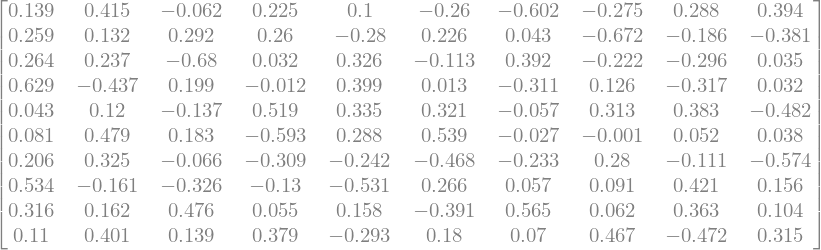

In [102]:
sympy.Matrix(np.around(np.hstack(xa),3))

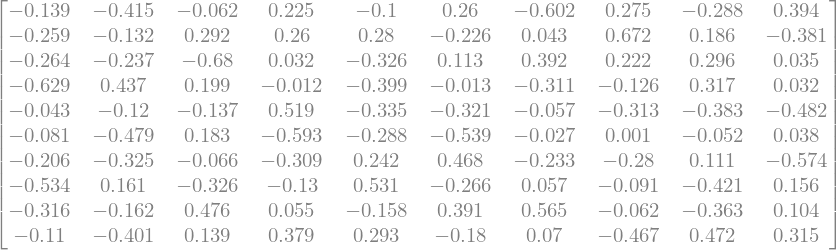

In [98]:
Q,R = np.linalg.qr(X)
sympy.Matrix(np.around(Q,3))

## Spectrum Decomposition

### Real Spectrum Theorem

对于$\R$上的算子，我们要求得是self-adjoint的

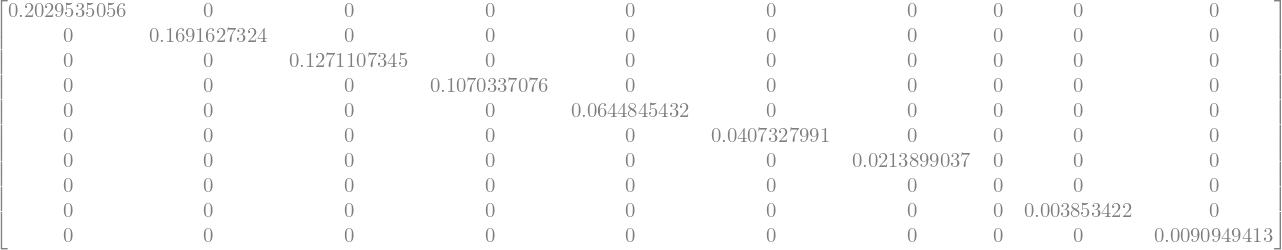

In [115]:
a = np.cov(X,rowvar=False) # a is self-adjoint.
c = np.linalg.eig(a)
eig_values = c[0]
p = c[1]
f = np.dot(np.dot(np.linalg.inv(p),a),p)
sympy.Matrix(np.round(f,10))

### Complex Spectrum Theorem

对于数域$\F$上的Normal Operator $T$，存在一个基，使得$T$在该基下的矩阵为对角矩阵. 值得注意的是，一个Operator称为Normal如果
$$
T^*T-TT^*=0.
$$

[[0 0 0]
 [0 0 0]
 [0 0 0]]


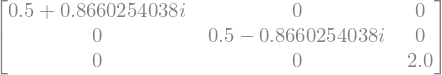

In [123]:
a = np.array([[1,1,0],[0,1,1],[1,0,1]]) # "a" is normal.
print(a.T @ a - a @ a.T)
c = np.linalg.eig(a)
eig_values = c[0]
p = c[1]
f = np.dot(np.dot(np.linalg.inv(p),a),p)
sympy.Matrix(np.round(f,10))

## LU Decomposition

感觉直接解线性方程组吗

## SVD 

In [1]:
import os

In [2]:
?os.mkdir